# SPECT DATASET
-charu saxena (Data3)

# DATA DESCRIPTION

The dataset describes diagnosing of cardiac Single Proton Emission Computed Tomography (SPECT) images.A SPECT scan of the heart is a noninvasive nuclear imaging test. It uses radioactive tracers that are injected into the blood to produce pictures of your heart. Doctors use SPECT to diagnose coronary artery disease. SPECT can show how well blood is flowing to the heart and how well the heart is working.It helps to find out  a person has coronary artery disease, had a heart attack or at a risk of it or has areas of scar tissue exist.

Each of the patients is classified into two categories: normal and abnormal. 
The database of 267 SPECT image sets (patients) was processed to extract features that summarize the original SPECT images.  
As a result, 44 continuous feature pattern was created for each patient.
The pattern was further processed to obtain 22 binary feature patterns.
The CLIP3 algorithm was used to generate classification rules from these patterns.The CLIP3 algorithm generated rules that were 84.0% accurate (as compared with cardilogists' diagnoses). 

     Number of Instances: 267
     Number of Attributes: 23 (22 binary + 1 binary class)
     Attribute Information:
   1.  OVERALL_DIAGNOSIS: 0,1 (class attribute, binary)
   2.  F1:  0,1 (the partial diagnosis 1, binary)
   3.  F2:  0,1 (the partial diagnosis 2, binary)
   4.  F3:  0,1 (the partial diagnosis 3, binary)
   5.  F4:  0,1 (the partial diagnosis 4, binary)
   6.  F5:  0,1 (the partial diagnosis 5, binary)
   7.  F6:  0,1 (the partial diagnosis 6, binary)
   8.  F7:  0,1 (the partial diagnosis 7, binary)
   9.  F8:  0,1 (the partial diagnosis 8, binary)
   10. F9:  0,1 (the partial diagnosis 9, binary)
   11. F10: 0,1 (the partial diagnosis 10, binary)
   12. F11: 0,1 (the partial diagnosis 11, binary)
   13. F12: 0,1 (the partial diagnosis 12, binary)
   14. F13: 0,1 (the partial diagnosis 13, binary)
   15. F14: 0,1 (the partial diagnosis 14, binary)
   16. F15: 0,1 (the partial diagnosis 15, binary)
   17. F16: 0,1 (the partial diagnosis 16, binary)
   18. F17: 0,1 (the partial diagnosis 17, binary)
   19. F18: 0,1 (the partial diagnosis 18, binary)
   20. F19: 0,1 (the partial diagnosis 19, binary)
   21. F20: 0,1 (the partial diagnosis 20, binary)
   22. F21: 0,1 (the partial diagnosis 21, binary)
   23. F22: 0,1 (the partial diagnosis 22, binary)
   
   
           dataset is divided into:
            a) training data ("SPECT.train" 80 instances)
            b) testing data ("SPECT.test" 187 instances)
    
            Missing Attribute Values: None

             Class Distribution:
              entire data
                Class		# examples
                   0		  55
                   1		  212
               training dataset
                 Class		# examples
                    0         40
                    1		  40
               testing dataset
                  Class		# examples
                    0		  15
                    1		  172

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support

# Load Dataset

In [2]:
train_data = pd.read_csv ("/Users/charusaxena/desktop/SPECT-train.csv")
test_data = pd.read_csv ("/Users/charusaxena/desktop/SPECT-test.csv")

In [3]:
from sklearn.model_selection import train_test_split
y = train_data['f23']
features = train_data
del features['f23']

In [4]:
y_test = test_data['f23']
X_test = test_data
del X_test['f23']


In [5]:
l1 = LogisticRegression(penalty='l1')
l2 = LogisticRegression(penalty='l2')
model1 = l1.fit(features,y)
model2 = l2.fit(features,y)

# Print the top 10 features and their weights with L1 regularization

In [23]:
l1_features_wgt=np.argsort(np.abs(l1.coef_[0]))[::-1]
flag=10
print("top 10 features:\n")
for i in l1_features_wgt:
    if flag>0:
        print("%s\t%0.3f" %(train_data.columns[i], l1.coef_[0][i]))
        flag-=1
    else:
        break


top 10 features:

f19	1.618
f14	0.609
f9	-0.585
f22	0.569
f8	0.517
f1	0.482
f20	-0.406
f5	0.156
f4	0.042
f16	0.000


# Print the top 10 features and their weights with L2 regularization

In [24]:
l2_features_wgt=np.argsort(np.abs(l2.coef_[0]))[::-1]
flag=10
print("top 10 features:\n")
for i in l2_features_wgt:
    if flag>0:
        print("%s\t%0.3f" %(train_data.columns[i], l2.coef_[0][i]))
        flag-=1
    else:
        break



top 10 features:

f19	0.963
f9	-0.947
f20	-0.624
f1	0.553
f14	0.543
f8	0.514
f22	0.492
f4	0.473
f5	0.423
f17	0.274


# Train a DecisionTreeClassifier  on the train split; use the default parameters for all, except max_depth=6, min_impurity_decrease=0.005.



accuracy for L1 0.647059

accuracy for L2 0.695187

accuracy for decision tree 0.663102


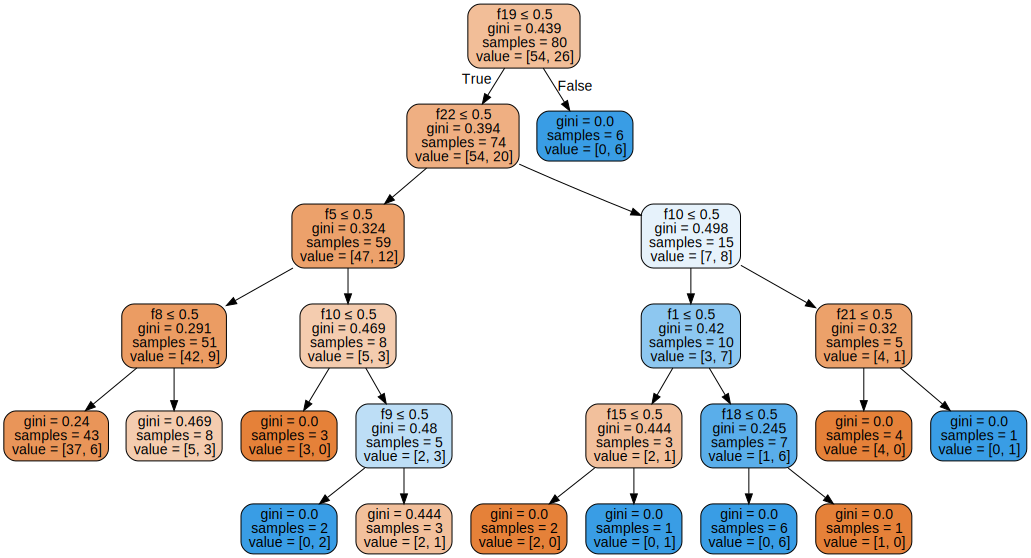

In [8]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
lm = DecisionTreeClassifier(max_depth=6,min_impurity_decrease=0.005)
model = lm.fit(features,y)
predict = lm.predict(X_test)
import graphviz
tree_dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=list(features),    
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(tree_dot_data)

print ("\naccuracy for L1 %2f" % model1.score(X_test,y_test))
print ("\naccuracy for L2 %2f" % model2.score(X_test,y_test))
print ("\naccuracy for decision tree %2f" % lm.score(X_test,y_test))

graph

# Result Discussion:

          L1       L2      Decison tree
          
          f19	  f19	   f19
          f14      f9	    f22
          f9       f20	   f10,f5
          f22      f1	   f8,f10,f1,f21
          f8       f14	   f9,f5,f18
 
 
    --Here we observe that for decesion tree the most important feature is f19 which is same for both L1 and L2. 
    --But here for the second, and further best we that there is a change. 
    -- For l1 and l2 f9 changes the order from 3 to 2 repectively. but in decison tree f9 appears at 5th node.
    -- for l1 and l2 same three features appear in top 5 for both. whereas it is just two(f19,f1) when compared l2 and decision tree, and three(f19,f9,f8) for l1 and decision tree.
    --The overall weight for L2 seems to be smaller than L1. like for f19 it is 0.96(L1) and for L1 is 1.6.
    -- here we see that accuracy for L2 is more than L1 and decsion tree.
    
    
 
 
 
 
 

# Z-scoring:

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
Z_X_train = scaler.fit_transform(features)
Z_X_test = scaler.fit_transform(X_test)


In [10]:
z_l1 = LogisticRegression(penalty='l1')
z_l2 = LogisticRegression(penalty='l2')
z_model1 = z_l1.fit(Z_X_train,y)
z_model2 = z_l2.fit(Z_X_train,y)

In [25]:
# for l1 after z score

Z_l1_features_wgt=np.argsort(np.abs(z_l1.coef_[0]))[::-1]
flag=10

print("top 10 features:\n")
for i in Z_l1_features_wgt:
    if flag>0:
        print("%s\t%0.3f" %(train_data.columns[i], z_l1.coef_[0][i]))
        flag-=1
    else:
        break



top 10 features:

f19	0.907
f9	-0.635
f20	-0.439
f1	0.420
f8	0.345
f4	0.330
f14	0.269
f22	0.167
f5	0.098
f16	0.075


In [26]:
# for l2 after z_score

Z_l2_features_wgt=np.argsort(np.abs(z_l2.coef_[0]))[::-1]
flag=10
print("top 10 features:\n")
for i in Z_l2_features_wgt:
    if flag>0:
        print("%s\t%0.3f" %(train_data.columns[i], z_l2.coef_[0][i]))
        flag-=1
    else:
        break



top 10 features:

f19	0.902
f9	-0.827
f20	-0.517
f4	0.491
f1	0.448
f8	0.404
f14	0.334
f2	-0.295
f15	-0.270
f5	0.258



accuracy for L1 0.631016

accuracy for L2 0.620321

accuracy for decision tree 0.663102


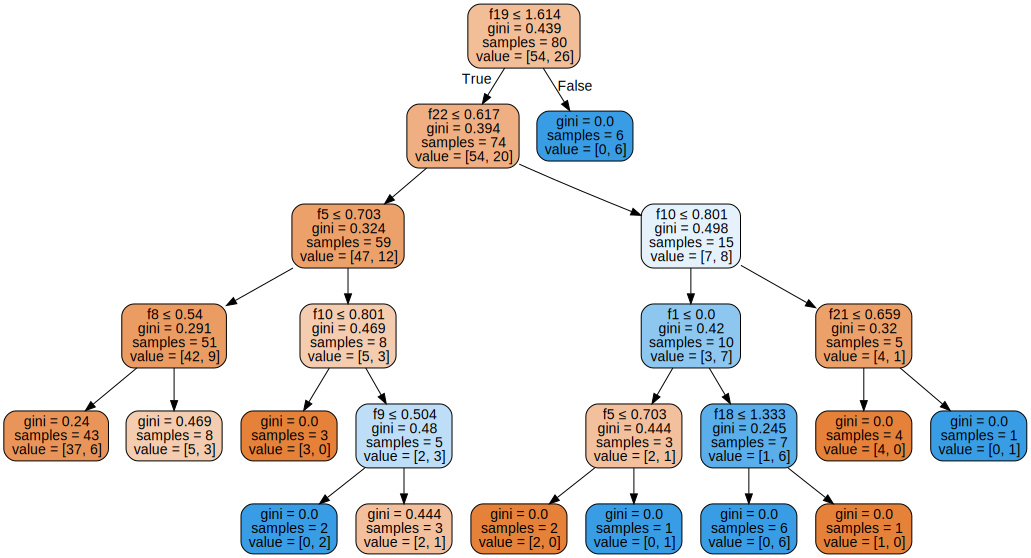

In [13]:
#tree

lm = DecisionTreeClassifier(max_depth=6,min_impurity_decrease=0.005)
model = lm.fit(Z_X_train,y)
predict = lm.predict(Z_X_test)

tree_dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=list(features),    
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(tree_dot_data)

print ("\naccuracy for L1 %2f" % z_model1.score(Z_X_test,y_test))
print ("\naccuracy for L2 %2f" % z_model2.score(Z_X_test,y_test))
print ("\naccuracy for decision tree %2f" % lm.score(Z_X_test,y_test))
graph

# Discussion after Z-scoring

     Before Z scoring:

          L1       L2      Decison tree
          
          f19	  f19	   f19
          f14      f9	    f22
          f9       f20	   f10,f5
          f22      f1	    f8,f10,f1,f21
          f8       f14	   f9,f5,f18
          
      
   
     After Z scoring:
     
         L1       L2      Decison tree
        
         f19	  f19	  f19
         f9       f9	   f22
         f20      f20	  f10
         f1       f4	   f8,f2,f1,f21
         f8       f1       f18,f21,f5
   
        
    Observation:
    
       -- We see that after z scoring the features selected by L1 and L2 matches more than what the result was 
       before Z scoring.Thus scaling does have some effect.
       -- With L1 regularization before and after scaling we see the change after second rank. The top feature still remain same which is f19 in here. But after scaling we see that f9 rank changes from third to second and f20 becomes third which was not even there in the top 5 before scaling.
       --With L2 regulalization, we see that before and after scaing the top three features remain same. fetaure f1 rank was drop from fourth to fifth after scaling, and f4 now becomes fourth which was isn't the top 5 list before scaling.
       -- The weights for L1,L2 decreases after scaling significantly,but also after scaling we see that L1 has
       lesser weight than L2 comapratively which was opposite case before scaling except for f19 for 
       --In decision tree we dont see significant difference in features ranks after scaling.
       -- The accurcay for decision tree now is more than L1 and L2, after scaling.
       



# 5. Evidences

    a) the total positive log-evidence,
    b) the total negative log-evidence, 
    c) probability distribution, 
    d) top 3 features values that contribute most to the positive evidence, 
    e) top 3 feature values that contribute the most to the negative evidence

In [14]:
def Total_evidence(object):
    #instnce
    positive_evidence=[]
    negative_evidence=[]
    evidence = []
    for i,val in enumerate(object):
        evidence.append(val* z_l2.coef_[0][i])
        if val* z_l2.coef_[0][i] >0:
            positive_evidence.append(val* z_l2.coef_[0][i])
        else:
            negative_evidence.append(val* z_l2.coef_[0][i])
            
    total_positive_evidence=sum(positive_evidence)
    total_negative_evidence=sum(negative_evidence)
    return total_positive_evidence, total_negative_evidence,evidence

def evidence(object):
    #instnce
    positive_evidence=[]
    negative_evidence=[]
    
    for i,val in enumerate(object):
        if val* z_l2.coef_[0][i] >0:
            positive_evidence.append(val* z_l2.coef_[0][i])
        else:
            negative_evidence.append(val* z_l2.coef_[0][i])
    return positive_evidence, negative_evidence

def top_features(evidence,pos,neg):
    
    Top_neg_index = np.argsort(evidence)
    
    #Top_pos_index = evidence.argsort()[::-1][:n]
    if neg>3:
        idx = 3
    else:
        idx=neg
        
    if pos>3:
        idx1 = 3
    else:
        idx1=pos  
    return Top_neg_index[:idx],Top_neg_index[-idx1:]
        
    

# 1.To find most positive object wrt probabilties

In [15]:
predict = z_l2.predict_proba(Z_X_test)
most_postive_object = Z_X_test[(np.argmax(predict[:,1]))]
print("most positive object wrt prob:\n",most_postive_object )

a = Total_evidence(most_postive_object)
print("\ntotal positive evidence:",a[0])
print("\ntotal negative evidence:",a[1])
print("\nclass distributuion",(predict[np.argmax(predict[:,1])]))
print("\n evidences: ",a[2])

#for top features:
pos_evi=evidence(most_postive_object)[0]
neg_evi=evidence(most_postive_object)[1]

indexNeg= top_features(a[2],len(pos_evi),len(neg_evi))[0]
indexPos = top_features(a[2],len(pos_evi),len(neg_evi))[1]
#print(indexNeg,indexPos)
columns = X_test.columns

print("\n\ntop negative features are:",columns[indexNeg],"\ntop positive features",columns[indexPos])

most positive object wrt prob:
 [ 0.29531221 -0.96324195  1.59006349  1.10733485  1.47291939 -0.9030692
  1.59006349 -0.64549722 -0.98408386  1.32287566 -0.84592927  1.67819145
  1.47291939  0.89335151  1.37000842 -0.52992633  1.3077251   2.28764799
  2.33415421 -0.61237244 -0.75592895  1.18213193]

total positive evidence: 5.45401173535

total negative evidence: -1.24592094332

class distributuion [ 0.03121688  0.96878312]

 evidences:  [0.13243401071694166, 0.2844902293700467, 0.11827451131128758, 0.54357710554119798, 0.3800274662060748, -0.1206280262098062, -0.1363840111968683, -0.26049781956213136, 0.81413634413912794, 0.082268069836858831, -0.16656150005111658, 0.19232052468889935, -0.012153045178183013, 0.29827895163060353, -0.3703335558209444, -0.073341493773869101, 0.0046307734534443493, -0.069997197977253761, 2.1045548591324814, 0.31651038519085212, -0.036024293554367363, 0.18250850412747979]


top negative features are: Index(['f15', 'f8', 'f11'], dtype='object') 
top positiv

# 2.To find most negative object wrt probabilties

In [16]:
predict = z_l2.predict_proba(Z_X_test)
most_negative_object = Z_X_test[(np.argmax(predict[:,0]))]
print("most positive object wrt prob:\n",most_negative_object )

b = Total_evidence(most_negative_object)
print("\ntotal positive evidence:",b[0])
print("\ntotal negative evidence:",b[1])
print("\nclass distributuion",(predict[np.argmax(predict[:,0])]))

print("\nevidences: ",b[2])
#For top features:
pos_evi=evidence(most_negative_object)[0]
neg_evi=evidence(most_negative_object)[1]

indexNeg= top_features(b[2],len(pos_evi),len(neg_evi))[0]
indexPos = top_features(b[2],len(pos_evi),len(neg_evi))[1]
#print(indexNeg,indexPos)
columns = X_test.columns

print("\n\ntop negative features are:",columns[indexNeg],"\ntop positive features",columns[indexPos])

most positive object wrt prob:
 [-3.38624669 -0.96324195 -0.62890571 -0.9030692  -0.67892378 -0.9030692
 -0.62890571 -0.64549722 -0.98408386  1.32287566 -0.84592927 -0.59587957
 -0.67892378 -1.11938021  1.37000842 -0.52992633 -0.76468671 -0.43713019
 -0.42842071  1.63299316 -0.75592895 -0.84592927]

total positive evidence: 1.25381462817

total negative evidence: -5.01686990706

class distributuion [ 0.98939811  0.01060189]

evidences:  [-1.5185766562209311, 0.2844902293700467, -0.046780217160434651, -0.44330560063554003, -0.17516891020436259, -0.1206280262098062, 0.053942929801746413, -0.26049781956213136, 0.81413634413912794, 0.082268069836858831, -0.16656150005111658, -0.068287722534464246, 0.0056017942618187318, -0.37374712011545502, -0.3703335558209444, -0.073341493773869101, -0.0027078251549801698, 0.013375260759984792, -0.38627905642305044, -0.84402769384227239, -0.036024293554367363, -0.13060241579764609]


top negative features are: Index(['f1', 'f20', 'f4'], dtype='object') 


# 3. To find object with highest positive evidence

In [17]:

Z_positive_evidence=[]
Z_negative_evidence=[]

for i in Z_X_test:
    
    Z_positive_evidence,Z_negative_evidence=evidence(i)

object_highest_PosEvi = Z_X_test[(np.argmax(Z_positive_evidence))]
print("object with highest positive evidence:\n",object_highest_PosEvi )


c= Total_evidence(object_highest_PosEvi)
print("\ntotal positive evidence:",c[0])
print("\ntotal negative evidence:",c[1])
print("\nclass distributuion",(predict[np.argmax(Z_positive_evidence)]))

print("\nevidences: ",c[2])
#for top features:
pos_evi=evidence(most_negative_object)[0]
neg_evi=evidence(most_negative_object)[1]

indexNeg= top_features(c[2],len(pos_evi),len(neg_evi))[0]
indexPos = top_features(c[2],len(pos_evi),len(neg_evi))[1]
#print(indexNeg,indexPos)
columns = X_test.columns

print("\n\ntop negative features are:",columns[indexNeg],"\ntop positive features",columns[indexPos])

object with highest positive evidence:
 [ 0.29531221 -0.96324195 -0.62890571 -0.9030692   1.47291939 -0.9030692
  1.59006349 -0.64549722 -0.98408386  1.32287566 -0.84592927  1.67819145
 -0.67892378 -1.11938021  1.37000842  1.88705474 -0.76468671 -0.43713019
 -0.42842071 -0.61237244 -0.75592895 -0.84592927]

total positive evidence: 2.48233135568

total negative evidence: -2.47385144168

class distributuion [ 0.68233624  0.31766376]

evidences:  [0.13243401071694166, 0.2844902293700467, -0.046780217160434651, -0.44330560063554003, 0.3800274662060748, -0.1206280262098062, -0.1363840111968683, -0.26049781956213136, 0.81413634413912794, 0.082268069836858831, -0.16656150005111658, 0.19232052468889935, 0.0056017942618187318, -0.37374712011545502, -0.3703335558209444, 0.26116727051182664, -0.0027078251549801698, 0.013375260759984792, -0.38627905642305044, 0.31651038519085212, -0.036024293554367363, -0.13060241579764609]


top negative features are: Index(['f4', 'f19', 'f14'], dtype='object') 

# 4. To find object with highest negative evidence

In [18]:
Z_positive_evidence=[]
Z_negative_evidence=[]

for i in Z_X_test:
    
    Z_positive_evidence,Z_negative_evidence=evidence(i)

object_highest_NegEvi = Z_X_test[(np.argmax(Z_negative_evidence))]
print("object with highest positive evidence:\n",object_highest_NegEvi )


d= Total_evidence(object_highest_NegEvi)
print("\ntotal positive evidence:",d[0])
print("\ntotal negative evidence:",d[1])
print("\nclass distributuion",(predict[np.argmax(Z_negative_evidence)]))

print("\nevidences: ",d[2])
#For top features:
pos_evi=evidence(most_negative_object)[0]
neg_evi=evidence(most_negative_object)[1]

indexNeg= top_features(d[2],len(pos_evi),len(neg_evi))[0]
indexPos = top_features(d[2],len(pos_evi),len(neg_evi))[1]
#print(indexNeg,indexPos)
columns = X_test.columns

print("\n\ntop negative features are:",columns[indexNeg],"\ntop positive features",columns[indexPos])


object with highest positive evidence:
 [ 0.29531221  1.03816077 -0.62890571 -0.9030692  -0.67892378  1.10733485
  1.59006349 -0.64549722 -0.98408386 -0.75592895  1.18213193  1.67819145
 -0.67892378 -1.11938021 -0.72992252 -0.52992633 -0.76468671 -0.43713019
 -0.42842071  1.63299316 -0.75592895 -0.84592927]

total positive evidence: 1.73584875248

total negative evidence: -3.26249403025

class distributuion [ 0.9088484  0.0911516]

evidences:  [0.13243401071694166, -0.30661724720993927, -0.046780217160434651, -0.44330560063554003, -0.17516891020436259, 0.1479129369001195, -0.1363840111968683, -0.26049781956213136, 0.81413634413912794, -0.047010325621062193, 0.23275901930220139, 0.19232052468889935, 0.0056017942618187318, -0.37374712011545502, 0.19730886170788023, -0.073341493773869101, -0.0027078251549801698, 0.013375260759984792, -0.38627905642305044, -0.84402769384227239, -0.036024293554367363, -0.13060241579764609]


top negative features are: Index(['f20', 'f4', 'f19'], dtype='obje

# 5 Most uncertain object

In [19]:
for i in predict:
    value= np.argmin(np.absolute([x[0]-x[1] for x in predict]))
print("object which most uncertain :\n", Z_X_test[value])    
e = Total_evidence(Z_X_test[value])
print("\ntotal positive evidence:",e[0],"\ntotal negative evidence:",e[1])
print("\nclass distributuion",(predict[np.argmax(value)]))

print("\nevidences",e[2])
#for top features:
pos_evi=evidence(most_negative_object)[0]
neg_evi=evidence(most_negative_object)[1]

indexNeg= top_features(e[2],len(pos_evi),len(neg_evi))[0]
indexPos = top_features(e[2],len(pos_evi),len(neg_evi))[1]
#print(indexNeg,indexPos)
columns = X_test.columns

print("\n\ntop negative features are:",columns[indexNeg],"\ntop positive features",columns[indexPos])

object which most uncertain :
 [ 0.29531221  1.03816077 -0.62890571 -0.9030692   1.47291939  1.10733485
 -0.62890571 -0.64549722 -0.98408386 -0.75592895  1.18213193 -0.59587957
 -0.67892378  0.89335151 -0.72992252 -0.52992633 -0.76468671 -0.43713019
 -0.42842071 -0.61237244 -0.75592895 -0.84592927]

total positive evidence: 2.59228796062 
total negative evidence: -1.80145401743

class distributuion [ 0.85962624  0.14037376]

evidences [0.13243401071694166, -0.30661724720993927, -0.046780217160434651, -0.44330560063554003, 0.3800274662060748, 0.1479129369001195, 0.053942929801746413, -0.26049781956213136, 0.81413634413912794, -0.047010325621062193, 0.23275901930220139, -0.068287722534464246, 0.0056017942618187318, 0.29827895163060353, 0.19730886170788023, -0.073341493773869101, -0.0027078251549801698, 0.013375260759984792, -0.38627905642305044, 0.31651038519085212, -0.036024293554367363, -0.13060241579764609]


top negative features are: Index(['f4', 'f19', 'f2'], dtype='object') 
top p